# Predicting Teacher Turnover

__Meaghan Ross__

Flatiron School Capstone

### Business Understanding

### Data Understanding

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,\
plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_validate

### Data Preparation

In [2]:
ls data/

SPR_SY1415_School_Metric_Scores_20160208.xlsx
SPR_SY1516_School_Metric_Scores_20170203.xlsx
SPR_SY1617_School_Metric_Scores_20180206.xlsx
SPR_SY1718_School_Metric_Scores_20190129.xlsx
SPR_SY1819_School_Metric_Scores_20200127.xlsx
df_2019
df_2019.csv
employee_information_April2015.csv
employee_information_April2016.csv
employee_information_April2017.csv
employee_information_April2018.csv
employee_information_April2019.csv
employee_information_April2020.csv
employee_information_April2021.csv
full_data.csv


In [3]:
df = pd.read_csv('data/df_2019.csv', index_col=0)

In [4]:
df.head()

,LAST_NAME,FIRST_NAME,PAY_RATE,TITLE_DESCRIPTION,HOME_ORGANIZATION,ORGANIZATION_LEVEL,GENDER,School,Turnaround Model,Enrollment,...,Student Survey Climate Score,Student Survey Climate Tier,Parent Survey Climate Score,Parent Survey Climate Tier,Parent Survey Participation Score,Parent Survey Participation Tier,Teacher Attendance Score,Student Survey Teaching Score,NEW_TEACHER,TURNOVER
0,ABAYOMI-IGE,OLABIMPE,90051,"TEACHER,SPEC EDUCATION",5070.0,HIGH SCHOOL,F,Parkway Northwest High School,None,260.0,...,48,WATCH,73.0,REINFORCE,18.0,INTERVENE,67,33,0,0
1,ABBOTT,JOYCE,76461,"TEACHER,FULL TIME",1290.0,ELEMENTARY SCHOOL,F,Andrew Hamilton School,None,532.0,...,0,INTERVENE,0.0,INTERVENE,1.0,INTERVENE,46,0,0,0
2,ABDUL-LATEEF,VILLIA,56531,"TEACHER,FULL TIME",1010.0,HIGH SCHOOL,F,John Bartram High School,None,561.0,...,52,REINFORCE,0.0,INTERVENE,2.0,INTERVENE,52,43,0,1
3,ABDULALEEM,MUHAMMAD,70564,"TEACHER,FULL TIME",6090.0,CAREER AND TECHNICAL HIGH SCHL,M,A. Philip Randolph Career and Technical High S...,None,493.0,...,56,REINFORCE,0.0,INTERVENE,2.0,INTERVENE,64,36,0,0
4,ABDULLAH,AARON,46694,"TEACHER,FULL TIME",6360.0,ELEMENTARY SCHOOL,M,Theodore Roosevelt School,Turnaround,525.0,...,47,WATCH,63.0,REINFORCE,10.0,INTERVENE,58,51,1,0


## EDA

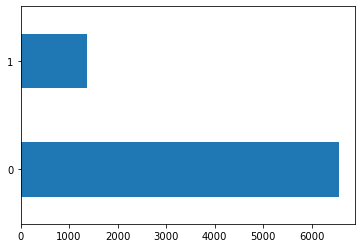

In [5]:
df['NEW_TEACHER'].value_counts().plot.barh();

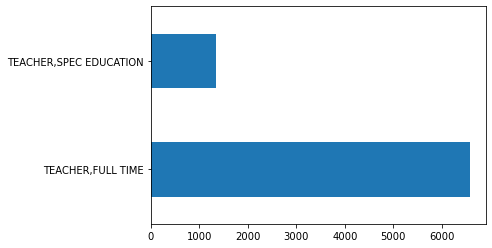

In [6]:
df['TITLE_DESCRIPTION'].value_counts().plot.barh();

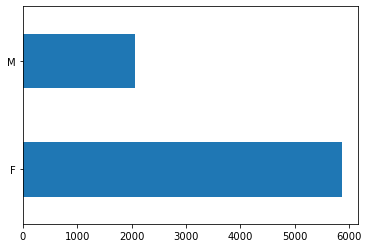

In [7]:
df['GENDER'].value_counts().plot.barh();

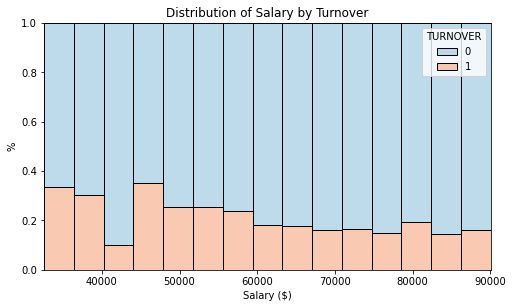

In [8]:
f = plt.figure(figsize=(8,10))
ax = f.add_subplot(2,1,1)

sns.histplot(data=df, ax=ax, stat='probability', multiple="fill",
             x="PAY_RATE", palette = 'RdBu_r',
             hue="TURNOVER", element="bars", 
             legend=True, bins=15)
ax.set_title("Distribution of Salary by Turnover")
ax.set_xlabel("Salary ($)")
ax.set_ylabel("%");

In [9]:
df.corr()

,PAY_RATE,HOME_ORGANIZATION,Enrollment,Clim Score,Attendance (95%+) Score,Retention Score,ISS Score,OSS Score,Parent Survey Climate Score,Parent Survey Participation Score,Teacher Attendance Score,NEW_TEACHER,TURNOVER
PAY_RATE,1.000000,0.038187,0.084483,0.124878,0.101647,0.100311,0.023937,0.094068,0.030273,-0.017216,0.052436,-0.716830,-0.128383
HOME_ORGANIZATION,0.038187,1.000000,0.420716,0.161885,0.042418,0.180387,-0.048261,0.164868,-0.046431,-0.055446,0.005062,-0.021044,-0.040983
Enrollment,0.084483,0.420716,1.000000,0.154257,0.089632,0.188510,-0.193487,0.054606,-0.158786,-0.197453,0.017680,-0.066778,-0.074059
Clim Score,0.124878,0.161885,0.154257,1.000000,0.884434,0.889190,0.123755,0.685835,0.248483,0.192925,0.439631,-0.112942,-0.147260
Attendance (95%+) Score,0.101647,0.042418,0.089632,0.884434,1.000000,0.755330,0.120543,0.644979,0.203678,0.119316,0.367596,-0.094704,-0.111212
Retention Score,0.100311,0.180387,0.188510,0.889190,0.755330,1.000000,0.034136,0.583733,0.149625,0.124893,0.483844,-0.094468,-0.146313
ISS Score,0.023937,-0.048261,-0.193487,0.123755,0.120543,0.034136,1.000000,0.211967,0.046071,0.056472,0.051395,-0.016847,0.022632
OSS Score,0.094068,0.164868,0.054606,0.685835,0.644979,0.583733,0.211967,1.000000,0.319913,0.247719,0.272244,-0.105428,-0.103168
Parent Survey Climate Score,0.030273,-0.046431,-0.158786,0.248483,0.203678,0.149625,0.046071,0.319913,1.000000,0.642356,0.185495,-0.007046,-0.029399
Parent Survey Participation Score,-0.017216,-0.055446,-0.197453,0.192925,0.119316,0.124893,0.056472,0.247719,0.642356,1.000000,0.174428,0.022961,-0.023279


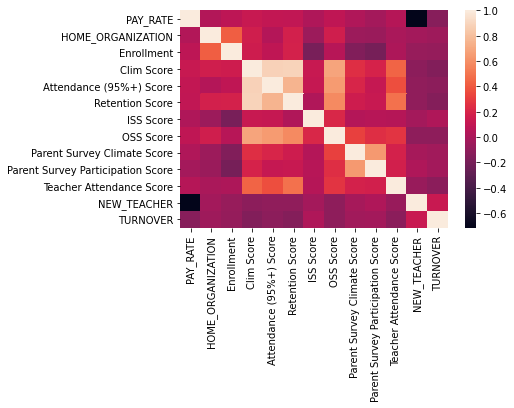

In [10]:
sns.heatmap(df.corr());

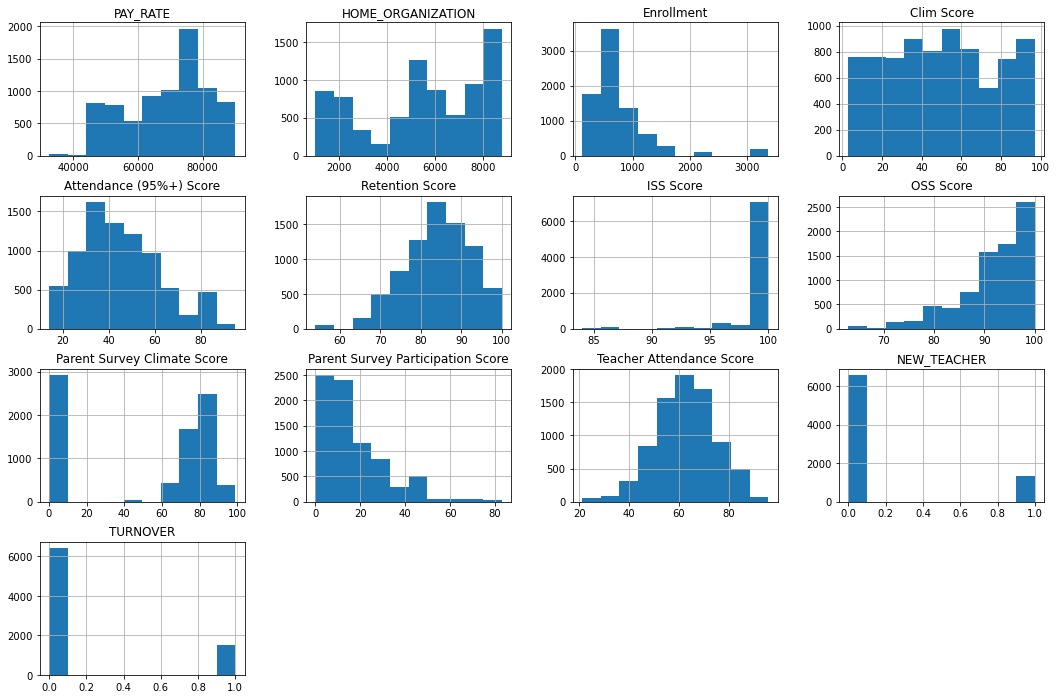

In [11]:
df.hist(figsize=(18, 12));


### Preprocessing

In [12]:
df.head()

,LAST_NAME,FIRST_NAME,PAY_RATE,TITLE_DESCRIPTION,HOME_ORGANIZATION,ORGANIZATION_LEVEL,GENDER,School,Turnaround Model,Enrollment,...,Student Survey Climate Score,Student Survey Climate Tier,Parent Survey Climate Score,Parent Survey Climate Tier,Parent Survey Participation Score,Parent Survey Participation Tier,Teacher Attendance Score,Student Survey Teaching Score,NEW_TEACHER,TURNOVER
0,ABAYOMI-IGE,OLABIMPE,90051,"TEACHER,SPEC EDUCATION",5070.0,HIGH SCHOOL,F,Parkway Northwest High School,None,260.0,...,48,WATCH,73.0,REINFORCE,18.0,INTERVENE,67,33,0,0
1,ABBOTT,JOYCE,76461,"TEACHER,FULL TIME",1290.0,ELEMENTARY SCHOOL,F,Andrew Hamilton School,None,532.0,...,0,INTERVENE,0.0,INTERVENE,1.0,INTERVENE,46,0,0,0
2,ABDUL-LATEEF,VILLIA,56531,"TEACHER,FULL TIME",1010.0,HIGH SCHOOL,F,John Bartram High School,None,561.0,...,52,REINFORCE,0.0,INTERVENE,2.0,INTERVENE,52,43,0,1
3,ABDULALEEM,MUHAMMAD,70564,"TEACHER,FULL TIME",6090.0,CAREER AND TECHNICAL HIGH SCHL,M,A. Philip Randolph Career and Technical High S...,None,493.0,...,56,REINFORCE,0.0,INTERVENE,2.0,INTERVENE,64,36,0,0
4,ABDULLAH,AARON,46694,"TEACHER,FULL TIME",6360.0,ELEMENTARY SCHOOL,M,Theodore Roosevelt School,Turnaround,525.0,...,47,WATCH,63.0,REINFORCE,10.0,INTERVENE,58,51,1,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7927 entries, 0 to 8251
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LAST_NAME                          7927 non-null   object 
 1   FIRST_NAME                         7927 non-null   object 
 2   PAY_RATE                           7927 non-null   int64  
 3   TITLE_DESCRIPTION                  7927 non-null   object 
 4   HOME_ORGANIZATION                  7927 non-null   float64
 5   ORGANIZATION_LEVEL                 7927 non-null   object 
 6   GENDER                             7927 non-null   object 
 7   School                             7927 non-null   object 
 8   Turnaround Model                   7927 non-null   object 
 9   Enrollment                         7927 non-null   float64
 10  Grades Served                      7927 non-null   object 
 11  Admissions Type                    7927 non-null   objec

In [14]:
drop_modeling = ['LAST_NAME', 'FIRST_NAME', 'HOME_ORGANIZATION', 'School', 'Overall Tier',
                 'Ach Tier', 'Prog Tier', 'Clim Tier', 'Attendance (95%+) Tier', 
                 'Retention Tier', 'ISS Tier', 'OSS Tier', 'Student Survey Climate Tier',
                 'Parent Survey Climate Tier', 'Parent Survey Participation Tier', 'TURNOVER']

In [15]:
X = df.drop(drop_modeling, axis=1)
y = df['TURNOVER']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [16]:
X_train.shape

(5945, 22)

There are some columns that are listed as objects when they should be numerical.

In [17]:
obj_to_num = ['Student Survey Climate Score', 'Student Survey Teaching Score', 
                  'Overall Score', 'Ach Score', 'Prog Score']

In [18]:
def na_transformer(df):
    '''
    Changes values to 0 for columns that have 
    'Not Applicable' or 'Insufficient Data' preventing them from becoming numerical.
    '''
    for col in obj_to_num:
        df.loc[(df[col] == 'Not Applicable'), col] = 0
        df.loc[(df[col] == 'Insufficient Data'), col] = 0
    return df

In [19]:
def to_float_transformer(df):
    '''
    Ensure all 'Score' columns are float, and all int64 are also float.
    '''
    for col in obj_to_num:
        df[col] = df[col].astype('float64')
    for col in [df.select_dtypes('int64').columns]:
        df[col] = df[col].astype('float64')
    return df

In [20]:
cat_columns = ['TITLE_DESCRIPTION', 'ORGANIZATION_LEVEL', 'GENDER', 'Turnaround Model',
               'Grades Served', 'Admissions Type']

# OneHotEncode the columns as part of cleaning
# to avoid needing to separate numerical and categorical
# columns later
ohe_col_trans = ColumnTransformer(transformers=
                                  [('ohe', OneHotEncoder(drop='first', sparse=False), cat_columns)],
                                 remainder='passthrough')

# Apply all our cleaning functions, then finish with ohe
cleaning_pipeline = Pipeline(steps=[
    ('na_trans', FunctionTransformer(na_transformer)),
    ('float', FunctionTransformer(to_float_transformer)),
    ('ohe_trans', ohe_col_trans)
])

In [21]:
X_train_clean = cleaning_pipeline.fit_transform(X_train)

/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-19-4e71e321aa9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('float64')
/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [22]:
ohe_feature_names = cleaning_pipeline.steps[-1][1].get_feature_names()

In [23]:
ohe_feature_names

['ohe__x0_TEACHER,SPEC EDUCATION',
 'ohe__x1_ELEMENTARY SCHOOL',
 'ohe__x1_HIGH SCHOOL',
 'ohe__x1_MIDDLE SCHOOL',
 'ohe__x2_M',
 'ohe__x3_School Redesign Initiative',
 'ohe__x3_Turnaround',
 "ohe__x4_'5-6'",
 "ohe__x4_'5-8'",
 "ohe__x4_'6-8'",
 "ohe__x4_'7-8'",
 "ohe__x4_'9-12'",
 "ohe__x4_'K-2'",
 "ohe__x4_'K-4'",
 "ohe__x4_'K-5'",
 "ohe__x4_'K-6'",
 "ohe__x4_'K-7'",
 "ohe__x4_'K-8'",
 'ohe__x5_Neighborhood',
 'ohe__x5_Special Admit',
 'PAY_RATE',
 'Enrollment',
 'Overall Score',
 'Ach Score',
 'Prog Score',
 'Clim Score',
 'Attendance (95%+) Score',
 'Retention Score',
 'ISS Score',
 'OSS Score',
 'Student Survey Climate Score',
 'Parent Survey Climate Score',
 'Parent Survey Participation Score',
 'Teacher Attendance Score',
 'Student Survey Teaching Score',
 'NEW_TEACHER']

### Modeling

In [39]:
def print_cv_scores(pipe, X, y):
    '''
    Runs cross_validate on given feature and binary target arrays using given pipeline, 
    printing the scoring results for both training and cross_val.
    '''
    scoring = ['accuracy','recall']
    # we pass in pipe to cross validate along with a feature list.
    results = cross_validate(pipe, X, 
                                   y, 
                                   return_train_score=True, scoring=scoring)
    
    print(results['train_accuracy'])
    print('Training Accuracy', results['train_accuracy'].mean())
    print('##############')
    print(results['test_accuracy'])
    print('Cross_Val Accuracy', results['test_accuracy'].mean())
    print('##############')
    print('Training Recall:', results['train_recall'].mean())
    print('Cross_Val Recall:', results['test_recall'].mean())


In [85]:
display_labels = ['Retention', 
                  'Turnover']

def print_cm_with_labels(y_true, 
                         y_pred, 
                         display_labels):
    '''
    Takes the true values and predicted values of a classifier and 
    plots a confusion matrix (normalized by predictions) using 
    a list of given display labels.
    '''
    cm = confusion_matrix(y_true, y_pred) #normalize = 'true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels)

    fig, ax = plt.subplots(figsize=(6,6))
    disp.plot(ax=ax)
    ax.grid(False)
    disp.ax_.set_xticklabels(display_labels,rotation=45);

#### Dummy Classifier

In [86]:
dummy_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('dc', DummyClassifier(strategy='most_frequent'))
])

In [87]:
print_cv_scores(dummy_pipe, X_train_clean, y_train)

[0.81055509 0.81055509 0.81055509 0.81055509 0.81076535]
Training Accuracy 0.8105971404541631
##############
[0.81076535 0.81076535 0.81076535 0.81076535 0.80992431]
Cross_Val Accuracy 0.8105971404541631
##############
Training Recall: 0.0
Cross_Val Recall: 0.0


In [88]:
dummy_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('dc', DummyClassifier(strategy='stratified'))
])
dummy_pipe.fit(X_train_clean, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('dc', DummyClassifier(strategy='stratified'))])

In [89]:
print_cv_scores(dummy_pipe, X_train_clean, y_train)

[0.70353238 0.69091674 0.69995795 0.68124474 0.69238856]
Training Accuracy 0.6936080740117746
##############
[0.67872161 0.686291   0.70058873 0.68713204 0.67199327]
Cross_Val Accuracy 0.6849453322119428
##############
Training Recall: 0.19271895424836602
Cross_Val Recall: 0.18740216322517206


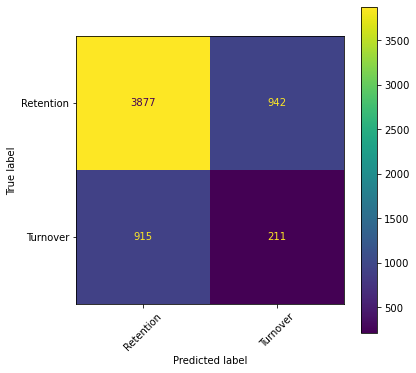

In [90]:
print_cm_with_labels(y_train,
                     dummy_pipe.predict(X_train_clean),
                     display_labels)

The dummy classifier is having a difficult time predicting the actual turnover. 

#### Logistic Regression

### Evaluation